### Importaçãode bibliotecas

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score, make_scorer, f1_score,precision_score,recall_score, plot_confusion_matrix

### Carregamento de dataset e pré-processamento

In [178]:
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [179]:
def taste(quality):
  if quality <= 5:
    return 0
  elif quality > 5 and quality <= 7:
    return 1
  else:
    return 2

In [180]:
X = data.iloc[:, 0:11].values
y = data.iloc[:, 11].values

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

## Decision Tree

In [182]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


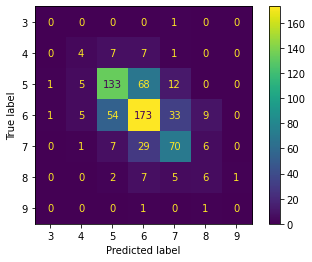

In [183]:
predicted_y = modelDT.predict(X_test)
plot_confusion_matrix(modelDT, X_test, y_test)

In [184]:
le = preprocessing.LabelEncoder()
y_test_dummy = le.fit_transform(y_test)
predicted_y_dummy = le.fit_transform(predicted_y)
y_test_dummy = np_utils.to_categorical(y_test_dummy)
predicted_y_dummy = np_utils.to_categorical(predicted_y_dummy)

In [185]:
roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = 'macro')
acc = accuracy_score(y_test,predicted_y)
precision = precision_score(y_test,predicted_y, average = "macro")
f1 = f1_score(y_test,predicted_y, average = "macro")
recall = recall_score(y_test,predicted_y, average = "macro")
print(">acc=%.4f,>prec=%.4f,>f1=%.4f,>rec=%.4f,roc=%.4f" % (acc,precision,f1,recall,roc))

>acc=0.5938,>prec=0.3393,>f1=0.3369,>rec=0.3360,roc=0.6248


## Naive Bayes

In [188]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB()

C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


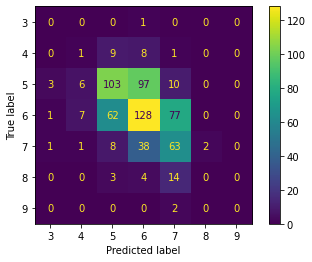

In [189]:
predicted_y = modelNB.predict(X_test)
plot_confusion_matrix(modelNB, X_test, y_test)

In [190]:
le = preprocessing.LabelEncoder()
y_test_dummy = le.fit_transform(y_test)
predicted_y_dummy = le.fit_transform(predicted_y)
y_test_dummy = np_utils.to_categorical(y_test_dummy)
predicted_y_dummy = np_utils.to_categorical(predicted_y_dummy)

In [191]:
roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = 'macro')
acc = accuracy_score(y_test,predicted_y)
precision = precision_score(y_test,predicted_y, average = "macro")
f1 = f1_score(y_test,predicted_y, average = "macro")
recall = recall_score(y_test,predicted_y, average = "macro")
print(">acc=%.4f,>prec=%.4f,>f1=%.4f,>rec=%.4f,roc=%.4f" % (acc,precision,f1,recall,roc))

>acc=0.4538,>prec=0.2092,>f1=0.2119,>rec=0.2208,roc=0.5612


C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [194]:
modelSVM = SVC(random_state=199)
modelSVM.fit(X_train, y_train)

SVC(random_state=199)

C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


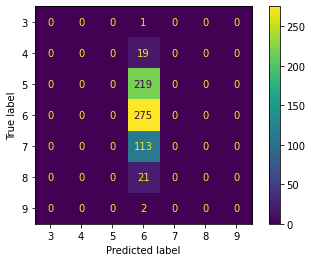

In [195]:
predicted_y = modelSVM.predict(X_test)
plot_confusion_matrix(modelSVM, X_test, y_test)

In [196]:
le = preprocessing.LabelEncoder()
y_test_dummy = le.fit_transform(y_test)
predicted_y_dummy = le.fit_transform(predicted_y)
y_test_dummy = np_utils.to_categorical(y_test_dummy)
predicted_y_dummy = np_utils.to_categorical(predicted_y_dummy)

In [197]:
roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = 'macro')
acc = accuracy_score(y_test,predicted_y)
precision = precision_score(y_test,predicted_y, average = "macro")
f1 = f1_score(y_test,predicted_y, average = "macro")
recall = recall_score(y_test,predicted_y, average = "macro")
print(">acc=%.4f,>prec=%.4f,>f1=%.4f,>rec=%.4f,roc=%.4f" % (acc,precision,f1,recall,roc))

>acc=0.4231,>prec=0.0604,>f1=0.0849,>rec=0.1429,roc=0.5000


C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [201]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


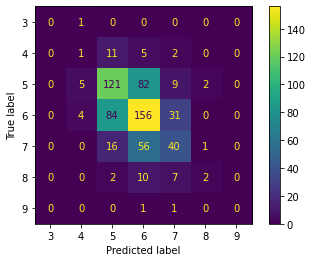

In [202]:
predicted_y = modelKNN.predict(X_test)
plot_confusion_matrix(modelKNN, X_test, y_test)

In [203]:
le = preprocessing.LabelEncoder()
y_test_dummy = le.fit_transform(y_test)
predicted_y_dummy = le.fit_transform(predicted_y)
y_test_dummy = np_utils.to_categorical(y_test_dummy)
predicted_y_dummy = np_utils.to_categorical(predicted_y_dummy)

In [204]:
roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = 'macro')
acc = accuracy_score(y_test,predicted_y)
precision = precision_score(y_test,predicted_y, average = "macro")
f1 = f1_score(y_test,predicted_y, average = "macro")
recall = recall_score(y_test,predicted_y, average = "macro")
print(">acc=%.4f,>prec=%.4f,>f1=%.4f,>rec=%.4f,roc=%.4f" % (acc,precision,f1,recall,roc))

>acc=0.4923,>prec=0.2794,>f1=0.2403,>rec=0.2317,roc=0.6012


C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MLP

In [206]:
labelencoder = LabelEncoder()
quality = labelencoder.fit_transform(y)
y_dummy = np_utils.to_categorical(y)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dummy, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

In [208]:
classifier = Sequential()
classifier.add(Dense(units=16, activation="linear",input_dim=11))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=16, activation="linear"))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=10, activation="softmax"))
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])
history = classifier.fit(X_train, y_train, batch_size=32,
                  epochs=50,validation_split=0.1)

Epoch 1/50
148/148 [==============================] - 1s 1ms/step - loss: 15.4123 - categorical_accuracy: 0.2944 - val_loss: 2.7428 - val_categorical_accuracy: 0.3890
Epoch 2/50
148/148 [==============================] - 0s 653us/step - loss: 6.0410 - categorical_accuracy: 0.3221 - val_loss: 2.5137 - val_categorical_accuracy: 0.2941
Epoch 3/50
148/148 [==============================] - 0s 686us/step - loss: 3.5410 - categorical_accuracy: 0.3252 - val_loss: 1.5682 - val_categorical_accuracy: 0.3814
Epoch 4/50
148/148 [==============================] - 0s 646us/step - loss: 2.6851 - categorical_accuracy: 0.3297 - val_loss: 1.4825 - val_categorical_accuracy: 0.3947
Epoch 5/50
148/148 [==============================] - 0s 669us/step - loss: 2.2046 - categorical_accuracy: 0.3474 - val_loss: 1.3623 - val_categorical_accuracy: 0.4061
Epoch 6/50
148/148 [==============================] - 0s 643us/step - loss: 1.8947 - categorical_accuracy: 0.3531 - val_loss: 1.3196 - val_categorical_accuracy: 

148/148 [==============================] - 0s 680us/step - loss: 1.1403 - categorical_accuracy: 0.4957 - val_loss: 1.1333 - val_categorical_accuracy: 0.5275
Epoch 50/50
148/148 [==============================] - 0s 668us/step - loss: 1.1362 - categorical_accuracy: 0.5024 - val_loss: 1.1197 - val_categorical_accuracy: 0.5256


In [209]:
predicted_y = classifier.predict(X_test)

y_test_transform = [np.argmax(t) for t in y_test]
predicted_y_transform = [np.argmax(t) for t in predicted_y]

matrix = confusion_matrix(predicted_y_transform, y_test_transform)

In [210]:
le = preprocessing.LabelEncoder()
y_test_dummy = le.fit_transform(y_test_transform)
predicted_y_dummy = le.fit_transform(predicted_y_transform)
y_test_dummy = np_utils.to_categorical(y_test_dummy)
predicted_y_dummy = np_utils.to_categorical(predicted_y_dummy)

In [211]:
roc = roc_auc_score(y_test_dummy,predicted_y_dummy,multi_class="ovo",average = 'macro')
acc = accuracy_score(y_test_transform,predicted_y_transform)
precision = precision_score(y_test_transform,predicted_y_transform, average = "macro")
f1 = f1_score(y_test_transform,predicted_y_transform, average = "macro")
recall = recall_score(y_test_transform,predicted_y_transform, average = "macro")

print(">acc=%.4f,>prec=%.4f,>f1=%.4f,>rec=%.4f,roc=%.4f" % (acc,precision,f1,recall,roc))

>acc=0.5215,>prec=0.2258,>f1=0.1881,>rec=0.1998,roc=0.3997


C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0  11 122  61  10   2   0]
 [  1   8  97 207  93  16   2]
 [  0   0   0   7  10   3   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


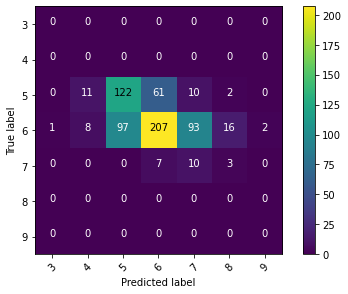

In [215]:
def plot_confusion_matrix(cm, classes, normalize=False, title='', cmap=plt.cm.viridis):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(matrix,["3","4","5","6","7","8","9"])